# 1. Library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import mediapipe as mp
import sklearn
import cv2
import tensorflow as tf

# 2. Keypoints using mediapipe holistics

In [3]:
mp_holistic = mp.solutions.holistic  #Download model -> make detections
mp_drawing = mp.solutions.drawing_utils #Drawing utility -> draw them

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert to RGB Color_space
    image.flags.writeable = False #cvt numpy to read-only
    res = model.process(image) #make prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, res

In [5]:
def draw_landmarks(image, res):
    #draw hand connections
    mp_drawing.draw_landmarks(image, 
                              res.face_landmarks,mp.solutions.face_mesh.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1),
                              mp_drawing.DrawingSpec(color = (80, 256, 121), thickness = 1, circle_radius = 1)) 
    mp_drawing.draw_landmarks(image, res.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #draw pose connection 
    # mp_drawing.draw_landmarks(image, res.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw hand connection
    mp_drawing.draw_landmarks(image, res.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw hand connection

In [6]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [7]:
mp.solutions.face_mesh.FACEMESH_TESSELATION??

Type:        frozenset
String form: frozenset({(18, 17), (82, 38), (8, 9), (456, 248), (167, 2), (303, 271), (69, 104), (253, 450), (41, 42), (315, 16), (73, 74), (339, 373), (258, 385), (105, 63), (219, 48), (304, 272), (236, 217), (231, 22), (85, 84), (365, 367), (237, 218), (243, 112), (436, 427), (409, 410), (248, 456), (330, 266), (136, 135), (88, 95), (394, 430), (107, 108), (118, 117), (439, 438), (442, 443), (260, 466), (115, 48), (342, 276), (121, 128), (200, 421), (113, 124), (132, 137), (23, 230), (343, 357), (443, 444), (62, 78), (26, 155), (228, 110), (432, 434), (364, 379), (325, 308), (424, 430), (36, 205), (363, 420), (21, 162), (328, 462), (419, 351), (366, 345), (193, 8), (363, 456), (183, 80), (307, 375), (94, 2), (333, 284), (17, 313), (185, 40), (44, 1), (291, 287), (411, 352), (20, 238), (59, 166), (272, 310), (420, 437), (387, 260), (130, 226), (51, 45), (175, 377), (202, 214), (353, 383), (339, 448), (291, 408), (466, 260), (264, 454), (457, 440), (355, 429), (9

In [8]:
# #intialize video capture
# cap = cv2.VideoCapture(0) #0: using computer's camera
# # min_detection_confidence -> Ngưỡng tin cậy tối thiểu để mô hình xác định (detect) một đối tượng mới trong khung hình.
# # min_tracking_confidence -> Ngưỡng tin cậy tối thiểu để mô hình theo dõi (track) các điểm đặc trưng từ khung hình trước.
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read() #ret: check if read the frame successful or not
#         #make detection
#         image, res = mediapipe_detection(frame, holistic)
#         #Draw landmark
#         draw_landmarks(image, res)
#         cv2.imshow('OpenCV Feed', image)
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             #waitkey: cease program for 10secs and listen keyboard
#             break

# cap.release()
# cv2.destroyAllWindows()

In [9]:
# res.face_landmarks.landmark #landmark: convert to list

In [10]:
# frame.shape

In [11]:
# res

In [12]:
# draw_landmarks(frame, res)  

In [13]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

# 3. Extract keypoint features

In [14]:
# # res is the result of the last frame
# res.left_hand_landmarks.landmark

In [15]:
def extract_keypoint(res):
    #Left_hand and right_hand do not return value if model didn't detect landmark so we need return 0
    pose = np.array([[point.x, point.y, point.z, point.visibility] for point in res.pose_landmarks.landmark]).ravel() if res.pose_landmarks else np.zeros(33*4)
    face = np.array([[point.x, point.y, point.z] for point in res.face_landmarks.landmark]).ravel() if res.face_landmarks else np.zeros(468*3)
    # lh = np.array([[point.x, point.y, point.z] for point in res.left_hand_landmarks.landmark]).ravel() if res.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[point.x, point.y, point.z] for point in res.right_hand_landmarks.landmark]).ravel() if res.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, rh])

In [16]:
# extract_keypoint(res).shape

# 4. Set Folder for Collections

In [17]:
data_path = os.path.join(r"C:\Users\Admin\OneDrive - Hanoi University of Science and Technology\Documents\Study\2024.2\CV\Project\data")

#Label of actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#number of video
no_sequences = 30
#number of frames each video
sequence_length = 30

In [18]:
#for each action we need to collect 30 video, each video contains 30 frames and each frame -> 1662 landmarks
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(data_path, action, str(sequence))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
#intialize video capture
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)

# min_detection_confidence -> Ngưỡng tin cậy tối thiểu để mô hình xác định (detect) một đối tượng mới trong khung hình.
# min_tracking_confidence -> Ngưỡng tin cậy tối thiểu để mô hình theo dõi (track) các điểm đặc trưng từ khung hình trước.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read() #ret: check if read the frame successful or not
                #make detection
                image, res = mediapipe_detection(frame, holistic)
                #Draw landmark
                draw_landmarks(image, res) 
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                keypoints = extract_keypoint(res)
                path = os.path.join(data_path, action , str(sequence), str(frame_num)+".npy")
                os.makedirs(os.path.dirname(path), exist_ok=True)
                np.save(path, keypoints)
        
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    #waitkey: cease program for 10millisecs and listen keyboard
                    break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Feature

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label: num for num, label in enumerate(actions)}

In [ ]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [ ]:
x = np.array(sequences) #(90, 30, 1662) -> 3 actions -> each action: 30 video -> each video: 30 frames -> each frames: 1662 keypoint
y = to_categorical(labels).astype(int) #One hot encoding

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.05)

In [ ]:
labels

# 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
log_dir = os.path.join("Logs")
tb_callback =TensorBoard(log_dir = log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs =2000, callbacks = tb_callback)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9898 - loss: 0.0631
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9824 - loss: 0.0830
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.9824 - loss: 0.0743
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9902 - loss: 0.0576
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.9902 - loss: 0.0578
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.9941 - loss: 0.0505
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9941 - loss: 0.0463
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.9902 - loss: 0.0554
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9902 - loss: 0.0577
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9824 - loss: 0.0712
Epoch 11/2000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [ ]:
ans = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
actions[np.argmax(res[3])]

'hello'

In [ ]:
ans[0].sum()

1.0

# 9. Save Weights

In [ ]:
model.save("action.keras")

In [ ]:
del model

In [ ]:
model.load_weights("action.keras")

# 10. Evaluation

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
x_test.shape

(5, 30, 1662)

In [ ]:
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(y_pred, axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

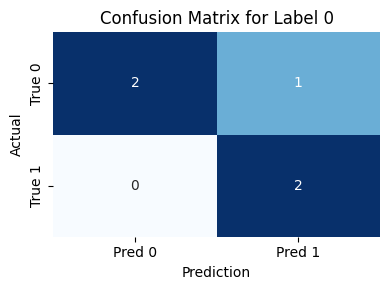

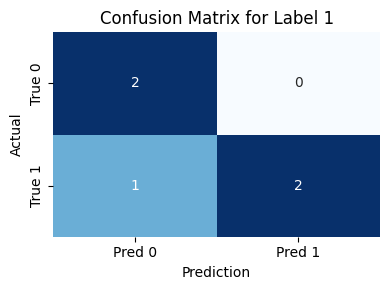

In [ ]:
import seaborn as sns

mcm = multilabel_confusion_matrix(y_true, y_pred)
for idx, cm in enumerate(mcm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for Label {idx}')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 11 Test in real time

In [ ]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def pro_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+40*num), (int(prob*100),90+40*num), colors[num], thickness = -1)
        cv2.putText(output_frame, actions[num], (0,85+40*num),cv2.FONT_HERSHEY_COMPLEX,1, color = (255,255,255),thickness = 2, lineType=cv2.LINE_AA)
    return output_frame 

In [ ]:
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, res = mediapipe_detection(frame, holistic)
        draw_landmarks(image, res)

        keypoints = extract_keypoint(res)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            ans = model.predict(np.expand_dims(sequence, axis=0))[0]

            if len(ans) > 0 and ans[np.argmax(ans)] > threshold:
                predicted_action = actions[np.argmax(ans)]
                
                if len(sentence) == 0 or predicted_action != sentence[-1]:
                    sentence.append(predicted_action)

                if len(sentence) > 5:
                    sentence = sentence[-5:]
                    
        image = pro_viz(ans, actions, image, colors)
        # Hiển thị kết quả
        cv2.rectangle(image, (0, 0), (640, 40), (247, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━